In [2]:
import pandas as pd
import numpy as np

In [14]:
df = pd.read_csv('datasets/winequality-red.csv', delimiter=';')

# Checking is there is null or NaN values

In [15]:
df[df.columns].isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [16]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Data exploratory Analysis

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as ply

In [17]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


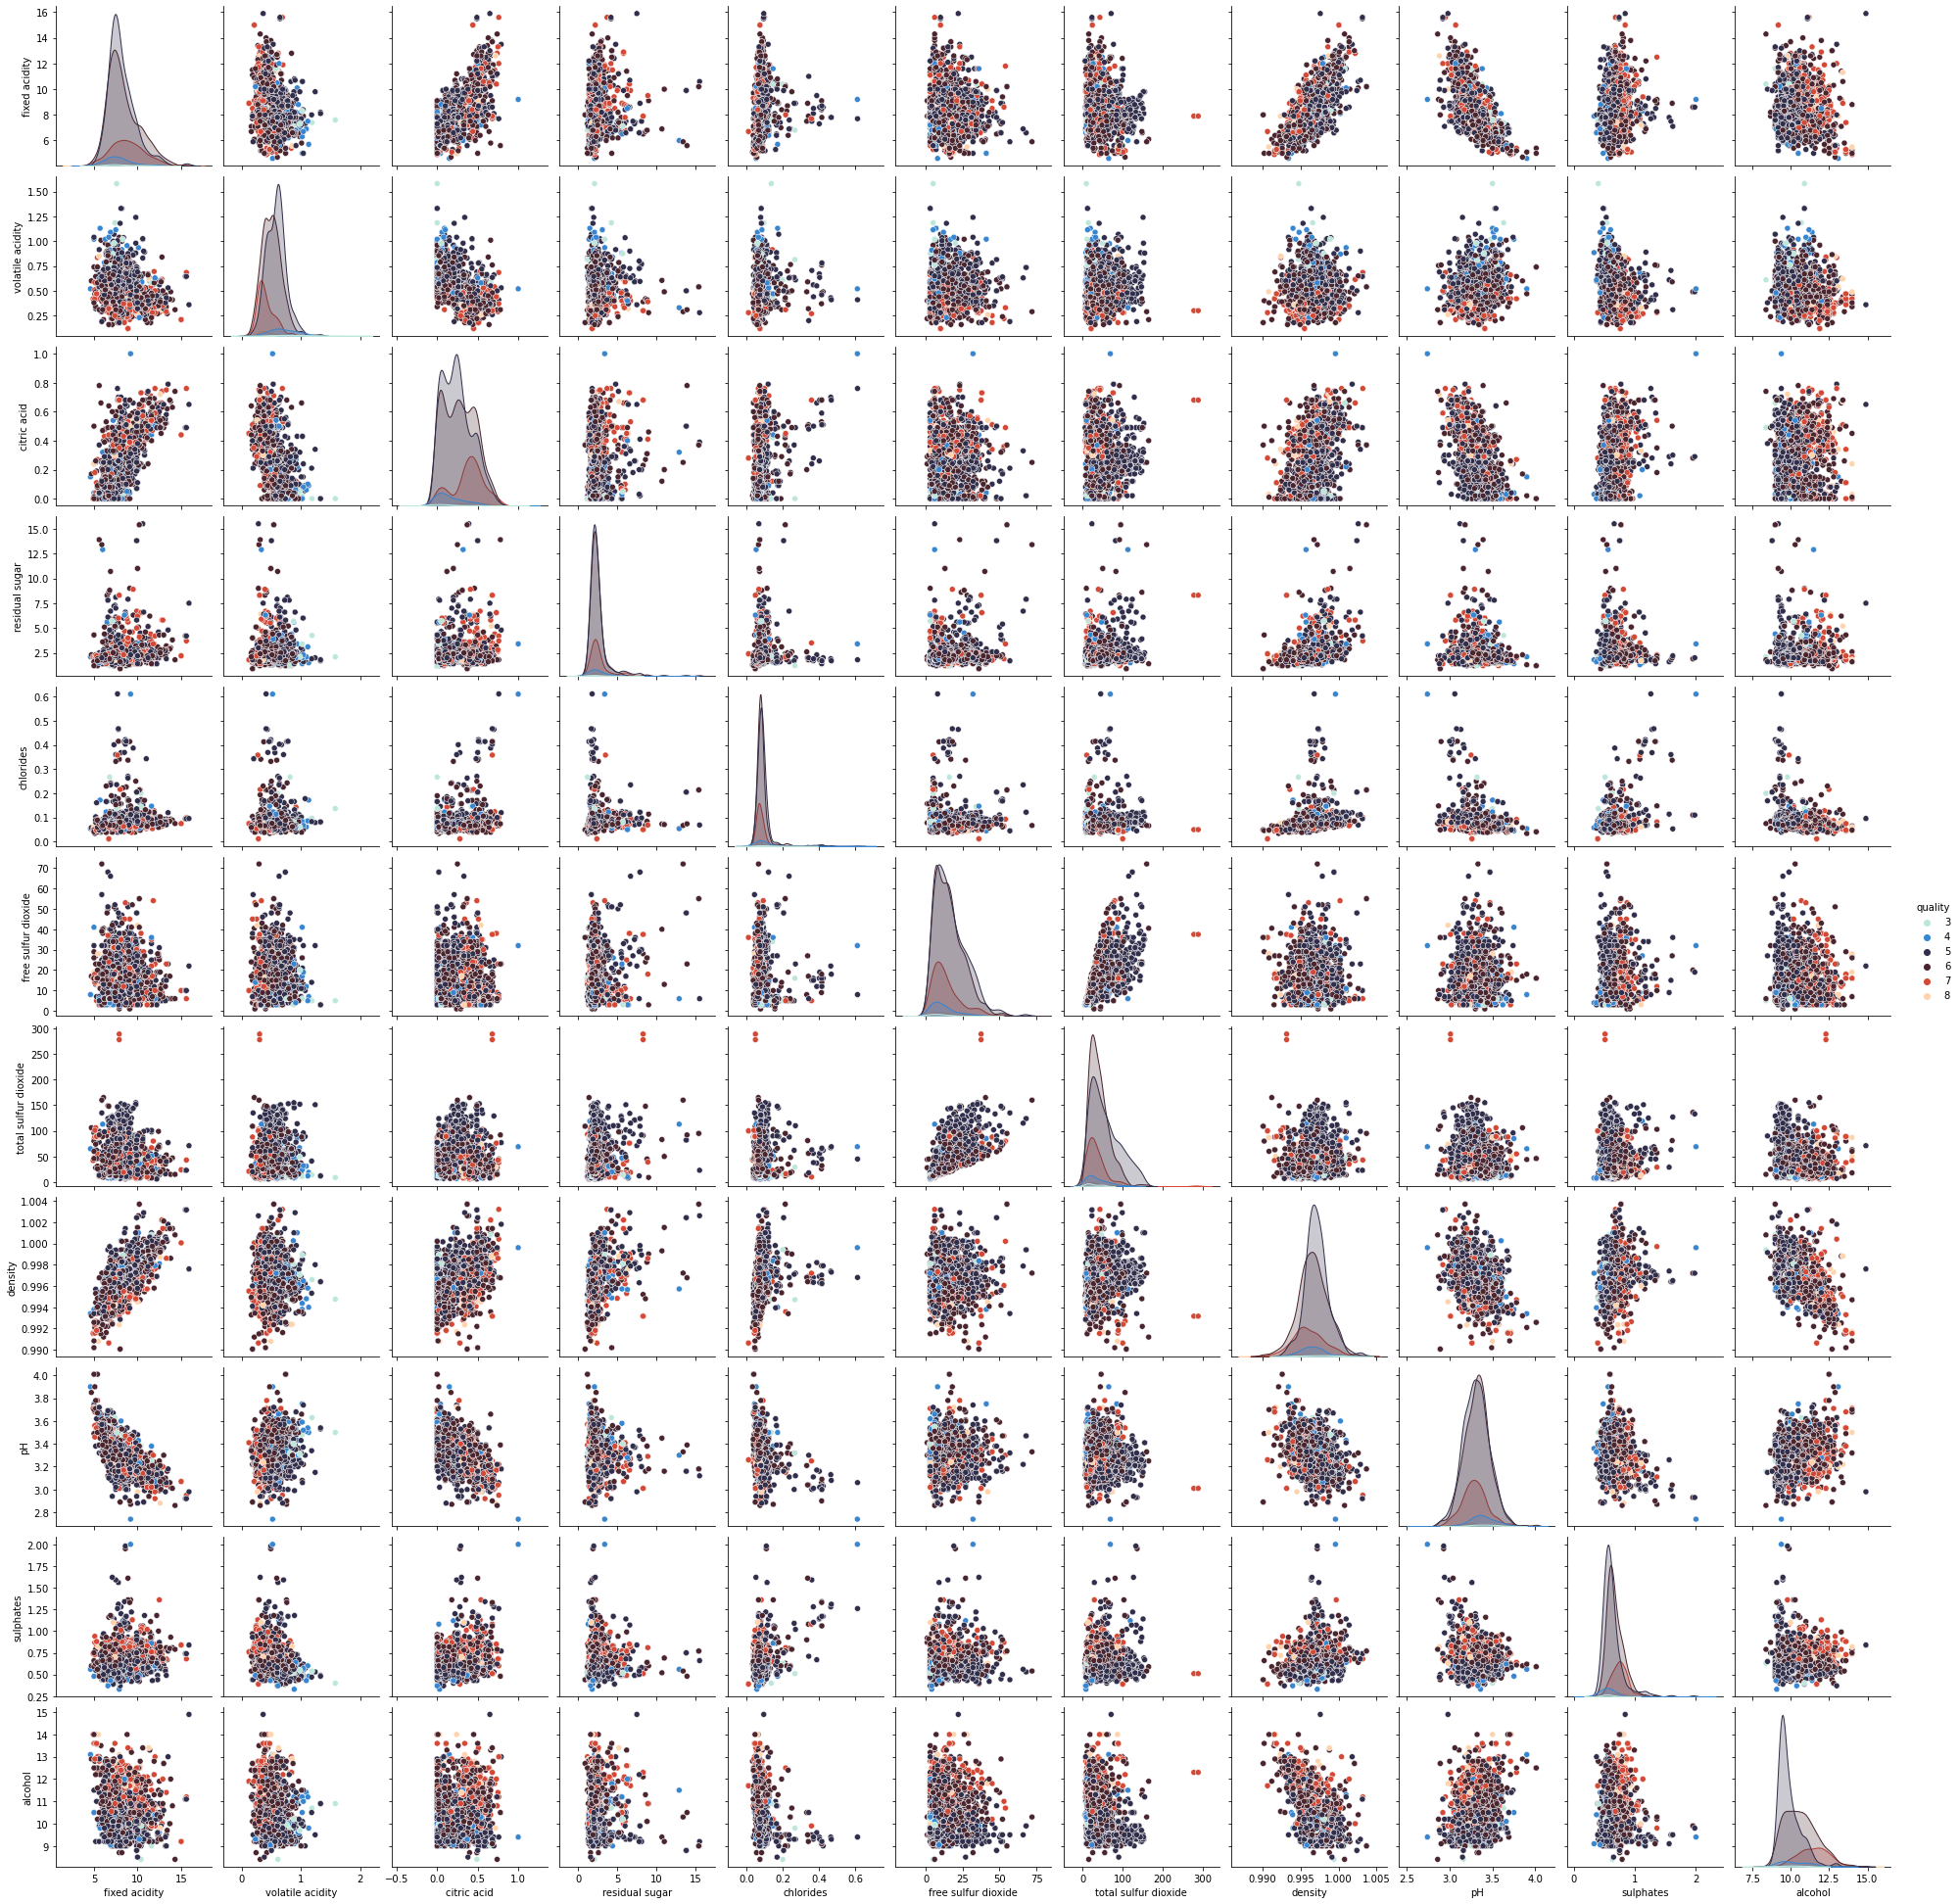

In [43]:
sns.pairplot(df, hue='quality',palette='icefire')

In [20]:
correlations = df.corr()

<AxesSubplot:>

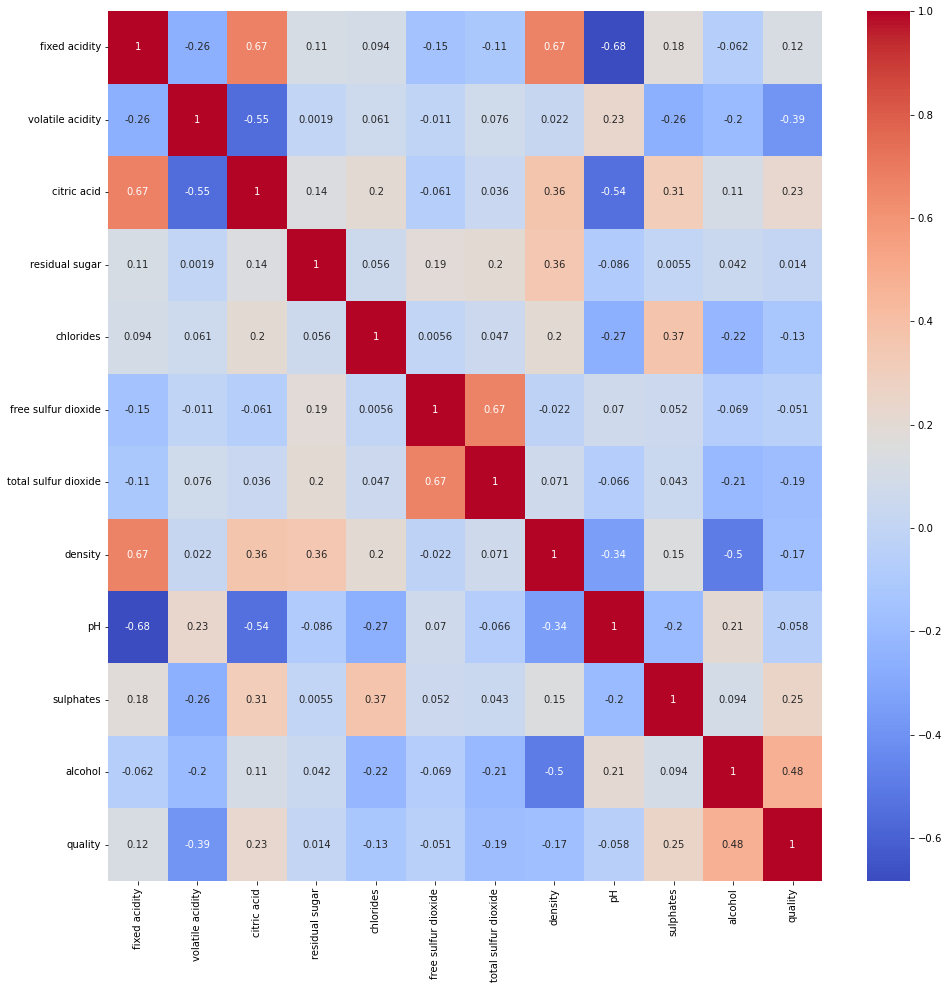

In [25]:
plt.figure(figsize=(16,16))
sns.heatmap(correlations,cmap='coolwarm',annot=True)

In [ ]:
#From the heatmap above we can conclude that there is no big redundance between the variables
# There is only some degree.

In [38]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [39]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

# Standadize the data

In [41]:
from sklearn.preprocessing import StandardScaler

In [44]:

scaler = StandardScaler()
scaler.fit(df.drop('quality',axis=1))

StandardScaler()

In [46]:
scaled_features = scaler.fit_transform(df.drop('quality', axis =1))

In [47]:
scaled_features

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [49]:
scaled_data = pd.DataFrame(scaled_features, columns=df.columns[:-1])
scaled_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


# Performing Feature Selection 

In [58]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

In [59]:
cols = df.columns
X = df[cols[:-1]]
y = df[cols[-1]]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [70]:
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('model',Lasso())
])


In [71]:
search = GridSearchCV(pipeline,
                     {'model__alpha': np.arange(0.1,10,0.1)},
                     cv = 5,
                     scoring="neg_mean_squared_error",
                     verbose=3
                     )

In [72]:
search.fit(X_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END .................model__alpha=0.1;, score=-0.478 total time=   0.0s
[CV 2/5] END .................model__alpha=0.1;, score=-0.489 total time=   0.0s
[CV 3/5] END .................model__alpha=0.1;, score=-0.484 total time=   0.0s
[CV 4/5] END .................model__alpha=0.1;, score=-0.442 total time=   0.0s
[CV 5/5] END .................model__alpha=0.1;, score=-0.381 total time=   0.0s
[CV 1/5] END .................model__alpha=0.2;, score=-0.524 total time=   0.0s
[CV 2/5] END .................model__alpha=0.2;, score=-0.509 total time=   0.0s
[CV 3/5] END .................model__alpha=0.2;, score=-0.541 total time=   0.0s
[CV 4/5] END .................model__alpha=0.2;, score=-0.500 total time=   0.0s
[CV 5/5] END .................model__alpha=0.2;, score=-0.455 total time=   0.0s
[CV 1/5] END .model__alpha=0.30000000000000004;, score=-0.596 total time=   0.0s
[CV 2/5] END .model__alpha=0.30000000000000004;

[CV 2/5] END ..model__alpha=2.4000000000000004;, score=-0.622 total time=   0.0s
[CV 3/5] END ..model__alpha=2.4000000000000004;, score=-0.699 total time=   0.0s
[CV 4/5] END ..model__alpha=2.4000000000000004;, score=-0.626 total time=   0.0s
[CV 5/5] END ..model__alpha=2.4000000000000004;, score=-0.621 total time=   0.0s
[CV 1/5] END ..model__alpha=2.5000000000000004;, score=-0.666 total time=   0.0s
[CV 2/5] END ..model__alpha=2.5000000000000004;, score=-0.622 total time=   0.0s
[CV 3/5] END ..model__alpha=2.5000000000000004;, score=-0.699 total time=   0.0s
[CV 4/5] END ..model__alpha=2.5000000000000004;, score=-0.626 total time=   0.0s
[CV 5/5] END ..model__alpha=2.5000000000000004;, score=-0.621 total time=   0.0s
[CV 1/5] END .................model__alpha=2.6;, score=-0.666 total time=   0.0s
[CV 2/5] END .................model__alpha=2.6;, score=-0.622 total time=   0.0s
[CV 3/5] END .................model__alpha=2.6;, score=-0.699 total time=   0.0s
[CV 4/5] END ...............

[CV 5/5] END .................model__alpha=4.5;, score=-0.621 total time=   0.0s
[CV 1/5] END .................model__alpha=4.6;, score=-0.666 total time=   0.0s
[CV 2/5] END .................model__alpha=4.6;, score=-0.622 total time=   0.0s
[CV 3/5] END .................model__alpha=4.6;, score=-0.699 total time=   0.0s
[CV 4/5] END .................model__alpha=4.6;, score=-0.626 total time=   0.0s
[CV 5/5] END .................model__alpha=4.6;, score=-0.621 total time=   0.0s
[CV 1/5] END .................model__alpha=4.7;, score=-0.666 total time=   0.0s
[CV 2/5] END .................model__alpha=4.7;, score=-0.622 total time=   0.0s
[CV 3/5] END .................model__alpha=4.7;, score=-0.699 total time=   0.0s
[CV 4/5] END .................model__alpha=4.7;, score=-0.626 total time=   0.0s
[CV 5/5] END .................model__alpha=4.7;, score=-0.621 total time=   0.0s
[CV 1/5] END .................model__alpha=4.8;, score=-0.666 total time=   0.0s
[CV 2/5] END ...............

[CV 4/5] END .................model__alpha=6.6;, score=-0.626 total time=   0.0s
[CV 5/5] END .................model__alpha=6.6;, score=-0.621 total time=   0.0s
[CV 1/5] END .................model__alpha=6.7;, score=-0.666 total time=   0.0s
[CV 2/5] END .................model__alpha=6.7;, score=-0.622 total time=   0.0s
[CV 3/5] END .................model__alpha=6.7;, score=-0.699 total time=   0.0s
[CV 4/5] END .................model__alpha=6.7;, score=-0.626 total time=   0.0s
[CV 5/5] END .................model__alpha=6.7;, score=-0.621 total time=   0.0s
[CV 1/5] END .................model__alpha=6.8;, score=-0.666 total time=   0.0s
[CV 2/5] END .................model__alpha=6.8;, score=-0.622 total time=   0.0s
[CV 3/5] END .................model__alpha=6.8;, score=-0.699 total time=   0.0s
[CV 4/5] END .................model__alpha=6.8;, score=-0.626 total time=   0.0s
[CV 5/5] END .................model__alpha=6.8;, score=-0.621 total time=   0.0s
[CV 1/5] END ...............

[CV 5/5] END .................model__alpha=8.8;, score=-0.621 total time=   0.0s
[CV 1/5] END .................model__alpha=8.9;, score=-0.666 total time=   0.0s
[CV 2/5] END .................model__alpha=8.9;, score=-0.622 total time=   0.0s
[CV 3/5] END .................model__alpha=8.9;, score=-0.699 total time=   0.0s
[CV 4/5] END .................model__alpha=8.9;, score=-0.626 total time=   0.0s
[CV 5/5] END .................model__alpha=8.9;, score=-0.621 total time=   0.0s
[CV 1/5] END .................model__alpha=9.0;, score=-0.666 total time=   0.0s
[CV 2/5] END .................model__alpha=9.0;, score=-0.622 total time=   0.0s
[CV 3/5] END .................model__alpha=9.0;, score=-0.699 total time=   0.0s
[CV 4/5] END .................model__alpha=9.0;, score=-0.626 total time=   0.0s
[CV 5/5] END .................model__alpha=9.0;, score=-0.621 total time=   0.0s
[CV 1/5] END .................model__alpha=9.1;, score=-0.666 total time=   0.0s
[CV 2/5] END ...............

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [73]:
search.best_params_

{'model__alpha': 0.1}

In [76]:
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)
importance

array([0.        , 0.13572932, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01897188,
       0.27004642])

In [78]:
X.columns[importance > 0]

Index(['volatile acidity', 'sulphates', 'alcohol'], dtype='object')

# Model Development

In [ ]:
#Models evaluation

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [87]:
#Evaluating Logistic Regression

model_name = 'Logistic Regression'
cv_score_lr = cross_val_score(LogisticRegression(),
                             X,y,
                              scoring='accuracy',
                              cv = 3,
                              n_jobs = -1,
                              verbose= 1
                             )
print('Mean score from %s model: %.3f'%(model_name,np.mean(cv_score_lr)))

Mean score from Logistic Regression model: 0.550


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


In [89]:
#Decision Tree Classifier
dtc = DecisionTreeClassifier()
model_name = 'Decision Tree Classifier'
cv_score_lr = cross_val_score(dtc,
                             X,y,
                              scoring='accuracy',
                              cv = 3,
                              n_jobs = -1,
                              verbose= 1
                             )
print('Mean score from %s model: %.3f'%(model_name,np.mean(cv_score_lr)))

Mean score from Decision Tree Classifier model: 0.441


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


In [93]:
#Random Forest Classifier
dtc = RandomForestClassifier(n_jobs=-1)
model_name = 'Decision Tree Classifier'
cv_score_lr = cross_val_score(dtc,
                             X,y,
                              scoring='accuracy',
                              cv = 3,
                              n_jobs = -1,
                              verbose= 1
                             )
print('Mean score from %s model: %.3f'%(model_name,np.mean(cv_score_lr)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Mean score from Decision Tree Classifier model: 0.568


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.3s finished


In [91]:
# Let's try a grid search to see if RandomForest could be better than a  Logistic Regression in this case

In [96]:
param_grid = {
    'n_estimators': [10,20,30],
    'max_depth': [6,10,20,30]
}

gridSearch = GridSearchCV(RandomForestClassifier(n_jobs=-1),
                         param_grid=param_grid,
                         scoring='accuracy', cv=3,
                         return_train_score=True, verbose=10
                         )
gridSearch.fit(X_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3; 1/12] START max_depth=6, n_estimators=10...............................
[CV 1/3; 1/12] END max_depth=6, n_estimators=10;, score=(train=0.801, test=0.571) total time=   1.0s
[CV 2/3; 1/12] START max_depth=6, n_estimators=10...............................
[CV 2/3; 1/12] END max_depth=6, n_estimators=10;, score=(train=0.784, test=0.633) total time=   0.0s
[CV 3/3; 1/12] START max_depth=6, n_estimators=10...............................
[CV 3/3; 1/12] END max_depth=6, n_estimators=10;, score=(train=0.756, test=0.675) total time=   0.0s
[CV 1/3; 2/12] START max_depth=6, n_estimators=20...............................
[CV 1/3; 2/12] END max_depth=6, n_estimators=20;, score=(train=0.772, test=0.574) total time=   0.0s
[CV 2/3; 2/12] START max_depth=6, n_estimators=20...............................
[CV 2/3; 2/12] END max_depth=6, n_estimators=20;, score=(train=0.773, test=0.633) total time=   0.0s
[CV 3/3; 2/12] START max_dept

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [6, 10, 20, 30],
                         'n_estimators': [10, 20, 30]},
             return_train_score=True, scoring='accuracy', verbose=10)

In [97]:
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [102]:
results =pd.DataFrame(gridSearch.cv_results_).sort_values( \
                                         by='rank_test_score')
results.to_csv('./random_forest_grid_search.csv',encoding='UTF-8')

In [103]:
#The best model reached
classifier = RandomForestClassifier(max_depth = 10, 
                             n_estimators = 30, 
                             n_jobs = -1)
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

0.6496212121212122

In [106]:
y_pred = classifier.predict(X_test)

In [107]:
from sklearn.metrics import confusion_matrix, classification_report

In [108]:
cm = confusion_matrix(y_test,y_pred)
cm 

array([[  0,   0,   2,   0,   0,   0],
       [  0,   0,   9,  10,   0,   0],
       [  0,   0, 168,  46,   3,   0],
       [  0,   0,  51, 146,  16,   0],
       [  0,   0,   1,  39,  29,   1],
       [  0,   0,   0,   2,   5,   0]], dtype=int64)

In [112]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        19
           5       0.73      0.77      0.75       217
           6       0.60      0.69      0.64       213
           7       0.55      0.41      0.47        70
           8       0.00      0.00      0.00         7

    accuracy                           0.65       528
   macro avg       0.31      0.31      0.31       528
weighted avg       0.61      0.65      0.63       528



C:\Users\lucas\.conda\envs\wine_env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lucas\.conda\envs\wine_env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lucas\.conda\envs\wine_env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
